
Total count for 00 and 11 are: {'11': 511, '00': 489}


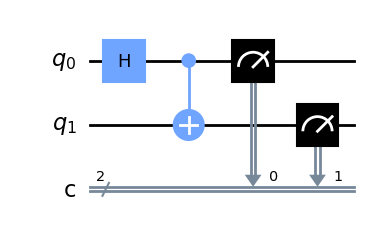

In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
circuit = QuantumCircuit(2, 2)

circuit.h(0)

circuit.cx(0, 1)

circuit.measure([0,1], [0,1])

compiled_circuit = transpile(circuit, simulator)

job = simulator.run(compiled_circuit, shots=1000)

res = job.result()

counts = res.get_counts(compiled_circuit)

print("\nTotal count for 00 and 11 are:", counts)

circuit.draw("mpl")

['.i 3', '.o 1', '.p 3', '.type esop', '110 1', '011 1', '1-1 1', '.e']


/home/niliwei/.local/lib/python3.7/site-packages/ipykernel_launcher.py:57: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).


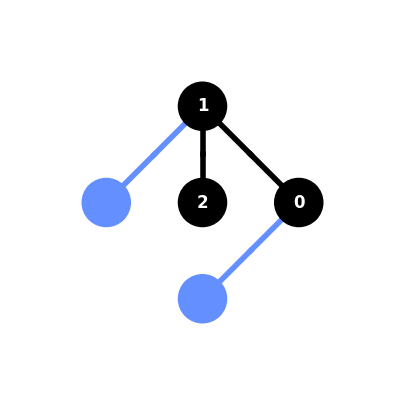

In [7]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, circuit_drawer, plot_bloch_multivector, plot_circuit_layout
from qiskit.providers.fake_provider import FakeVigoV2
def parse_esop(esop_lines):
    num_inputs = int(esop_lines[0].split()[1])
    num_outputs = int(esop_lines[1].split()[1])
    num_cubes  = int(esop_lines[2].split()[1])
    
    # 创建量子电路
    esop_circuit = QuantumCircuit(num_inputs, num_outputs)

    # Add Toffoli gates dynamically based on ESOP strings
    for line in esop_lines[4:-1]:  # Skip .type esop and .e lines
        line = line.split()
        controls = [i for i, val in enumerate(line[0]) if val == '1']
        target = [i for i, val in enumerate(line[0]) if val == '-']
        
        if len(controls) > 0:
            if len(target) > 0:
                esop_circuit.mcx(controls, target[0])
            elif len(controls) > 1:         # If no '-' (don't care) positions, set target to the last control
                esop_circuit.mcx(controls[:-1], controls[-1])
            elif len(controls) == 1:        # Apply X gate for a single control qubit
                print(controls[0])
                esop_circuit.x( controls[0] )

    esop_circuit.measure_all()

    return esop_circuit


# 读取 ESOP 文件
esop_file_content = """
.i 3
.o 1
.p 3
.type esop
110 1
011 1
1-1 1
.e
"""

esop_lines = esop_file_content.strip().split('\n')

print(esop_lines)

# 解析 ESOP 并创建量子电路
esop_circuit = parse_esop(esop_lines)

# 使用 Aer 模拟器模拟电路
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(esop_circuit, simulator)
qobj = assemble(compiled_circuit)

# 运行模拟器
result = simulator.run(qobj).result()

# # 绘制结果
# counts = result.get_counts(esop_circuit)
# plot_histogram(counts)

backend = FakeVigoV2()
new_circ_lv3 = transpile(esop_circuit, backend=backend, optimization_level=3)

plot_circuit_layout(new_circ_lv3, backend)

# # 绘制图形
# esop_circuit.remove_final_measurements(inplace=True)
# esop_circuit.draw("mpl")
# circuit_drawer(esop_circuit, output='mpl', filename="circuit.pdf")

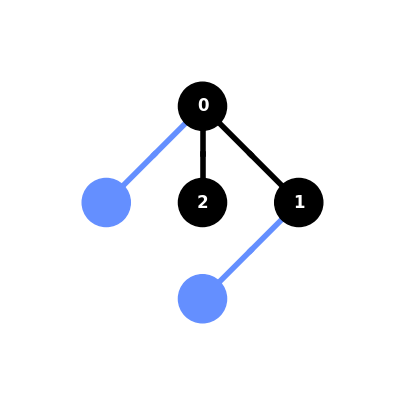

In [5]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import FakeVigoV2
from qiskit.visualization import plot_circuit_layout
from qiskit.tools.monitor import job_monitor
from qiskit.providers.fake_provider import FakeVigoV2
import matplotlib.pyplot as plt
ghz = QuantumCircuit(3, 3)
ghz.h(0)
for idx in range(1,3):
    ghz.cx(0,idx)
ghz.measure(range(3), range(3))
backend = FakeVigoV2()
new_circ_lv3 = transpile(ghz, backend=backend, optimization_level=3)
plot_circuit_layout(new_circ_lv3, backend)